# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [2]:
import pandas as pd

## imports for Python, Pandas

In [3]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [5]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [6]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [7]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Starting over from imports

In [59]:
#import packages
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

# set pandas to display more chars in a column cell
pd.options.display.max_colwidth = 1000 # This will help with preventing any memory overload and prevent a crash.

In [60]:
#import json as string
json_string = json.load(open('data/world_bank_projects.json'))

#simple and quick pretty print method
#currently commented out due to NotebookApp.iopub_data_rate_limit=1000000.0   limit exceeded
print(json.dumps(json_string, indent=4))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
#import json as dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethiopia-general-education-quality-improvement-project-ii?lang=en
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic management'}","[{'code': '24', 'name': 'Other economic management'}, {'code': '54', 'name': 'Social safety nets'}]","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'}, {'code': '25', 'name': 'Administrative and civil service reform'}, {'code': '81', 'name': 'Climate change'}, {'code': '52', 'name': 'Natural disaster management'}]","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civic engagement'}","[{'code': '57', 'name': 'Participation and civic engagement'}, {'code': '59', 'name': 'Gender'}]","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development and competitiveness'}","[{'code': '45', 'name': 'Export development and competitiveness'}, {'code': '41', 'name': 'Micro, Small and Medium Enterprise support'}]","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/second-private-sector-competitiveness-economic-diversification?lang=en
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and civil service reform'}","[{'code': '25', 'name': 'Administrative and civil service reform'}, {'code': '39', 'name': 'Infrastructure services for private sector development'}]","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/first-national-highways-interconnectivity-improvement-project?lang=en
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/china-renewable-energy-scale-up-program-phase-ii?lang=en
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDI

In [62]:
json_df[['country_namecode','countrycode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
country_namecode    500 non-null object
countrycode         500 non-null object
dtypes: object(2)
memory usage: 7.9+ KB


There are no null values for country for all 500 records in dataframe.

1, Find the 10 countries with most projects

In [63]:
#create Pandas Series for counts of countries of each projects in ascending order
countries = json_df['countrycode'].value_counts()

#print the top 10 countries with most projects
print(countries[:10])

CN    19
ID    19
VN    17
IN    16
RY    13
BD    12
NP    12
MA    12
3A    11
MZ    11
Name: countrycode, dtype: int64


In [64]:
# What is country code '3A'?
print(json_df[json_df['countrycode']=='3A']['country_namecode'].unique())

['Africa!$!3A']


2, Find the top 10 major project themes (using column 'mjtheme_namecode')

In [65]:
# use normalization to create tables from nested element and save to major_projects
projects = json_normalize(json_string, 'mjtheme_namecode',['countrycode','countryshortname'])
print(projects.head())
print(projects.shape)
print(type(projects))

  code                                   name countrycode countryshortname
0    8                      Human development          ET         Ethiopia
1   11                                                 ET         Ethiopia
2    1                    Economic management          TN          Tunisia
3    6  Social protection and risk management          TN          Tunisia
4    5                  Trade and integration          TV           Tuvalu
(1499, 4)
<class 'pandas.core.frame.DataFrame'>


In [66]:
#get some info about project themes in dataframe
print(projects.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code                1499 non-null object
name                1499 non-null object
countrycode         1499 non-null object
countryshortname    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB
None


major_projects.info() seems to suggest there are no null values for column 'name' but from major_projects.head(), we know that is not the case.

In [67]:
#create Series of counts of projects
major_projects=projects.name.value_counts()
print(major_projects[:10])
print(type(major_projects))


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64
<class 'pandas.core.series.Series'>


Without filling in the nulls, above is the top ten list of projects.

3, In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [68]:
#change all empty name in projects to NaN
projects['name'].replace('', np.nan, inplace=True)

cleaner_projects=projects.name.value_counts()
print(cleaner_projects[:10])
print(type(cleaner_projects))
print(projects.info())

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code                1499 non-null object
name                1377 non-null object
countrycode         1499 non-null object
countryshortname    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB
None


We see now that name contains 1377 non-null objects which is 1499 minus the original empty name of 122.

In [69]:
#create a dataframe with rows dropped where its 'name' column contains NaN
non_null_projects = projects.dropna(subset=['name'])

print(type(non_null_projects.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1498
Data columns (total 4 columns):
code                1377 non-null object
name                1377 non-null object
countrycode         1377 non-null object
countryshortname    1377 non-null object
dtypes: object(4)
memory usage: 53.8+ KB
<class 'NoneType'>


In [70]:
#create dictionary of all codes and names
codes = non_null_projects['code'].unique()
print(type(codes))
print(codes)

#use for loop to find out the name of each code and create a dict of code and name
codename={}
for code in codes:
    
    #adding [0] because unique() returns a list
    codename[code]= non_null_projects[non_null_projects['code']==code]['name'].unique()[0]

print(codename.items())

<class 'numpy.ndarray'>
['8' '1' '6' '5' '2' '11' '7' '4' '10' '9' '3']
dict_items([('8', 'Human development'), ('1', 'Economic management'), ('6', 'Social protection and risk management'), ('5', 'Trade and integration'), ('2', 'Public sector governance'), ('11', 'Environment and natural resources management'), ('7', 'Social dev/gender/inclusion'), ('4', 'Financial and private sector development'), ('10', 'Rural development'), ('9', 'Urban development'), ('3', 'Rule of law')])


In [71]:
#use the codename dictionary to fill in NaN values in projects dataframe
projects['name'] = projects.name.fillna(projects.code.map(codename))

print(type(projects))
print(projects.info())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code                1499 non-null object
name                1499 non-null object
countrycode         1499 non-null object
countryshortname    1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB
None


In [72]:
#get the updated top ten project themes
updated_major_projects=projects.name.value_counts()
print(updated_major_projects[:10])
print(type(updated_major_projects))

print(major_projects[:10])
print(type(major_projects))

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64
<class 'pandas.core.series.Series'>
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Tra

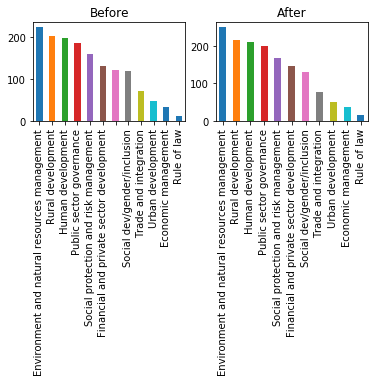

In [73]:
#play with plots

plt.subplot(2,2,1)
major_projects.plot(kind='bar')
plt.title('Before')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
updated_major_projects.plot(kind='bar')
plt.title('After')
plt.xticks(rotation=90)
plt.show()